In [1]:
import findspark
import pandas as pd
findspark.init()
from pyspark.sql import SQLContext
from pyspark import SparkContext
sc = SparkContext()
sqlContext = SQLContext(sc)

In [17]:
anual_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\datos_usados_modelos\\anual_data_2018.csv', delimiter=";")

In [3]:
anual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701045 entries, 0 to 701044
Data columns (total 32 columns):
ID_SEGMENTO           701045 non-null object
COD_LABORALIDAD       701045 non-null object
FECHA                 701045 non-null object
MES                   701045 non-null object
HORA                  701045 non-null object
MINUTO                701045 non-null object
CANTIDAD_PREC         701045 non-null object
TOTAL_VEHICULOS       701045 non-null object
TOTAL_VEHICULOS_1     701045 non-null object
TOTAL_VEHICULOS_2     701045 non-null object
TOTAL_VEHICULOS_3     701045 non-null object
TOTAL_VEHICULOS_4     701045 non-null object
TOTAL_VEHICULOS_5     701045 non-null object
TOTAL_VEHICULOS_6     701045 non-null object
TOTAL_VEHICULOS_7     701045 non-null object
TOTAL_VEHICULOS_8     701045 non-null object
TOTAL_VEHICULOS_9     701045 non-null object
TOTAL_VEHICULOS_10    701045 non-null object
TOTAL_VEHICULOS_11    701045 non-null object
TOTAL_VEHICULOS_12    701045 non-n

In [43]:
results = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\src\\1_partial_results.csv', delimiter=";")

In [44]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53760 entries, 0 to 53759
Data columns (total 9 columns):
ALGORITHM_ORIGIN      53750 non-null float64
ID_SEGMENT            53750 non-null float64
FECHA                 53750 non-null object
PREDICCION_INT 15     53750 non-null float64
PREDICCION_INT 60     53750 non-null float64
PREDICCION_INT 120    53750 non-null float64
IND_ACCIDENTE_15      0 non-null float64
IND_ACCIDENTE_60      0 non-null float64
IND_ACCIDENTE_120     0 non-null float64
dtypes: float64(8), object(1)
memory usage: 3.7+ MB


In [45]:
results.FECHA.unique()

array(['2019-03-01 00:00:00', '2019-03-01 00:15:00',
       '2019-03-01 00:30:00', '2019-03-01 00:45:00',
       '2019-03-01 01:00:00', '2019-03-01 01:15:00',
       '2019-03-01 01:30:00', '2019-03-01 01:45:00',
       '2019-03-01 02:00:00', '2019-03-01 02:15:00',
       '2019-03-01 02:30:00', '2019-03-01 02:45:00',
       '2019-03-01 03:00:00', '2019-03-01 03:15:00',
       '2019-03-01 03:30:00', '2019-03-01 03:45:00',
       '2019-03-01 04:00:00', '2019-03-01 04:15:00',
       '2019-03-01 04:30:00', '2019-03-01 04:45:00',
       '2019-03-01 05:00:00', '2019-03-01 05:15:00',
       '2019-03-01 05:30:00', '2019-03-01 05:45:00',
       '2019-03-01 06:00:00', '2019-03-01 06:15:00',
       '2019-03-01 06:30:00', '2019-03-01 06:45:00',
       '2019-03-01 07:00:00', '2019-03-01 07:15:00',
       '2019-03-01 07:30:00', '2019-03-01 07:45:00',
       '2019-03-01 08:00:00', '2019-03-01 08:15:00',
       '2019-03-01 08:30:00', '2019-03-01 08:45:00',
       '2019-03-01 09:00:00', '2019-03-01 09:1

In [65]:
results_fbrpophet_seg = results.loc[(results.ALGORITHM_ORIGIN==2) & (results.ID_SEGMENT==6) & (pd.to_datetime(results.FECHA).dt.month ==3)]

In [66]:
results_fbrpophet_seg.FECHA.unique()

array(['2019-03-01 00:00:00', '2019-03-01 00:15:00',
       '2019-03-01 00:30:00', '2019-03-01 00:45:00',
       '2019-03-01 01:00:00', '2019-03-01 01:15:00',
       '2019-03-01 01:30:00', '2019-03-01 01:45:00',
       '2019-03-01 02:00:00', '2019-03-01 02:15:00',
       '2019-03-01 02:30:00', '2019-03-01 02:45:00',
       '2019-03-01 03:00:00', '2019-03-01 03:15:00',
       '2019-03-01 03:30:00', '2019-03-01 03:45:00',
       '2019-03-01 04:00:00', '2019-03-01 04:15:00',
       '2019-03-01 04:30:00', '2019-03-01 04:45:00',
       '2019-03-01 05:00:00', '2019-03-01 05:15:00',
       '2019-03-01 05:30:00', '2019-03-01 05:45:00',
       '2019-03-01 06:00:00', '2019-03-01 06:15:00',
       '2019-03-01 06:30:00', '2019-03-01 06:45:00',
       '2019-03-01 07:00:00', '2019-03-01 07:15:00',
       '2019-03-01 07:30:00', '2019-03-01 07:45:00',
       '2019-03-01 08:00:00', '2019-03-01 08:15:00',
       '2019-03-01 08:30:00', '2019-03-01 08:45:00',
       '2019-03-01 09:00:00', '2019-03-01 09:1

In [55]:
results_fbrpophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 2 to 172802
Data columns (total 9 columns):
ALGORITHM_ORIGIN      2881 non-null int64
ID_SEGMENT            2881 non-null int64
FECHA                 2881 non-null object
PREDICCION_INT 15     2881 non-null float64
PREDICCION_INT 60     2881 non-null float64
PREDICCION_INT 120    2881 non-null float64
IND_ACCIDENTE_15      0 non-null float64
IND_ACCIDENTE_60      0 non-null float64
IND_ACCIDENTE_120     0 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 225.1+ KB


In [67]:
anual_data_seg = anual_data.loc[(anual_data.MES==3) & (anual_data.ID_SEGMENTO==6)]

In [30]:
anual_data_seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 114703 to 163823
Data columns (total 32 columns):
ID_SEGMENTO           2457 non-null object
COD_LABORALIDAD       2457 non-null object
FECHA                 2457 non-null object
MES                   2457 non-null object
HORA                  2457 non-null object
MINUTO                2457 non-null object
CANTIDAD_PREC         2457 non-null object
TOTAL_VEHICULOS       2457 non-null object
TOTAL_VEHICULOS_1     2457 non-null object
TOTAL_VEHICULOS_2     2457 non-null object
TOTAL_VEHICULOS_3     2457 non-null object
TOTAL_VEHICULOS_4     2457 non-null object
TOTAL_VEHICULOS_5     2457 non-null object
TOTAL_VEHICULOS_6     2457 non-null object
TOTAL_VEHICULOS_7     2457 non-null object
TOTAL_VEHICULOS_8     2457 non-null object
TOTAL_VEHICULOS_9     2457 non-null object
TOTAL_VEHICULOS_10    2457 non-null object
TOTAL_VEHICULOS_11    2457 non-null object
TOTAL_VEHICULOS_12    2457 non-null object
TOTAL_VEHICULOS_13    2457

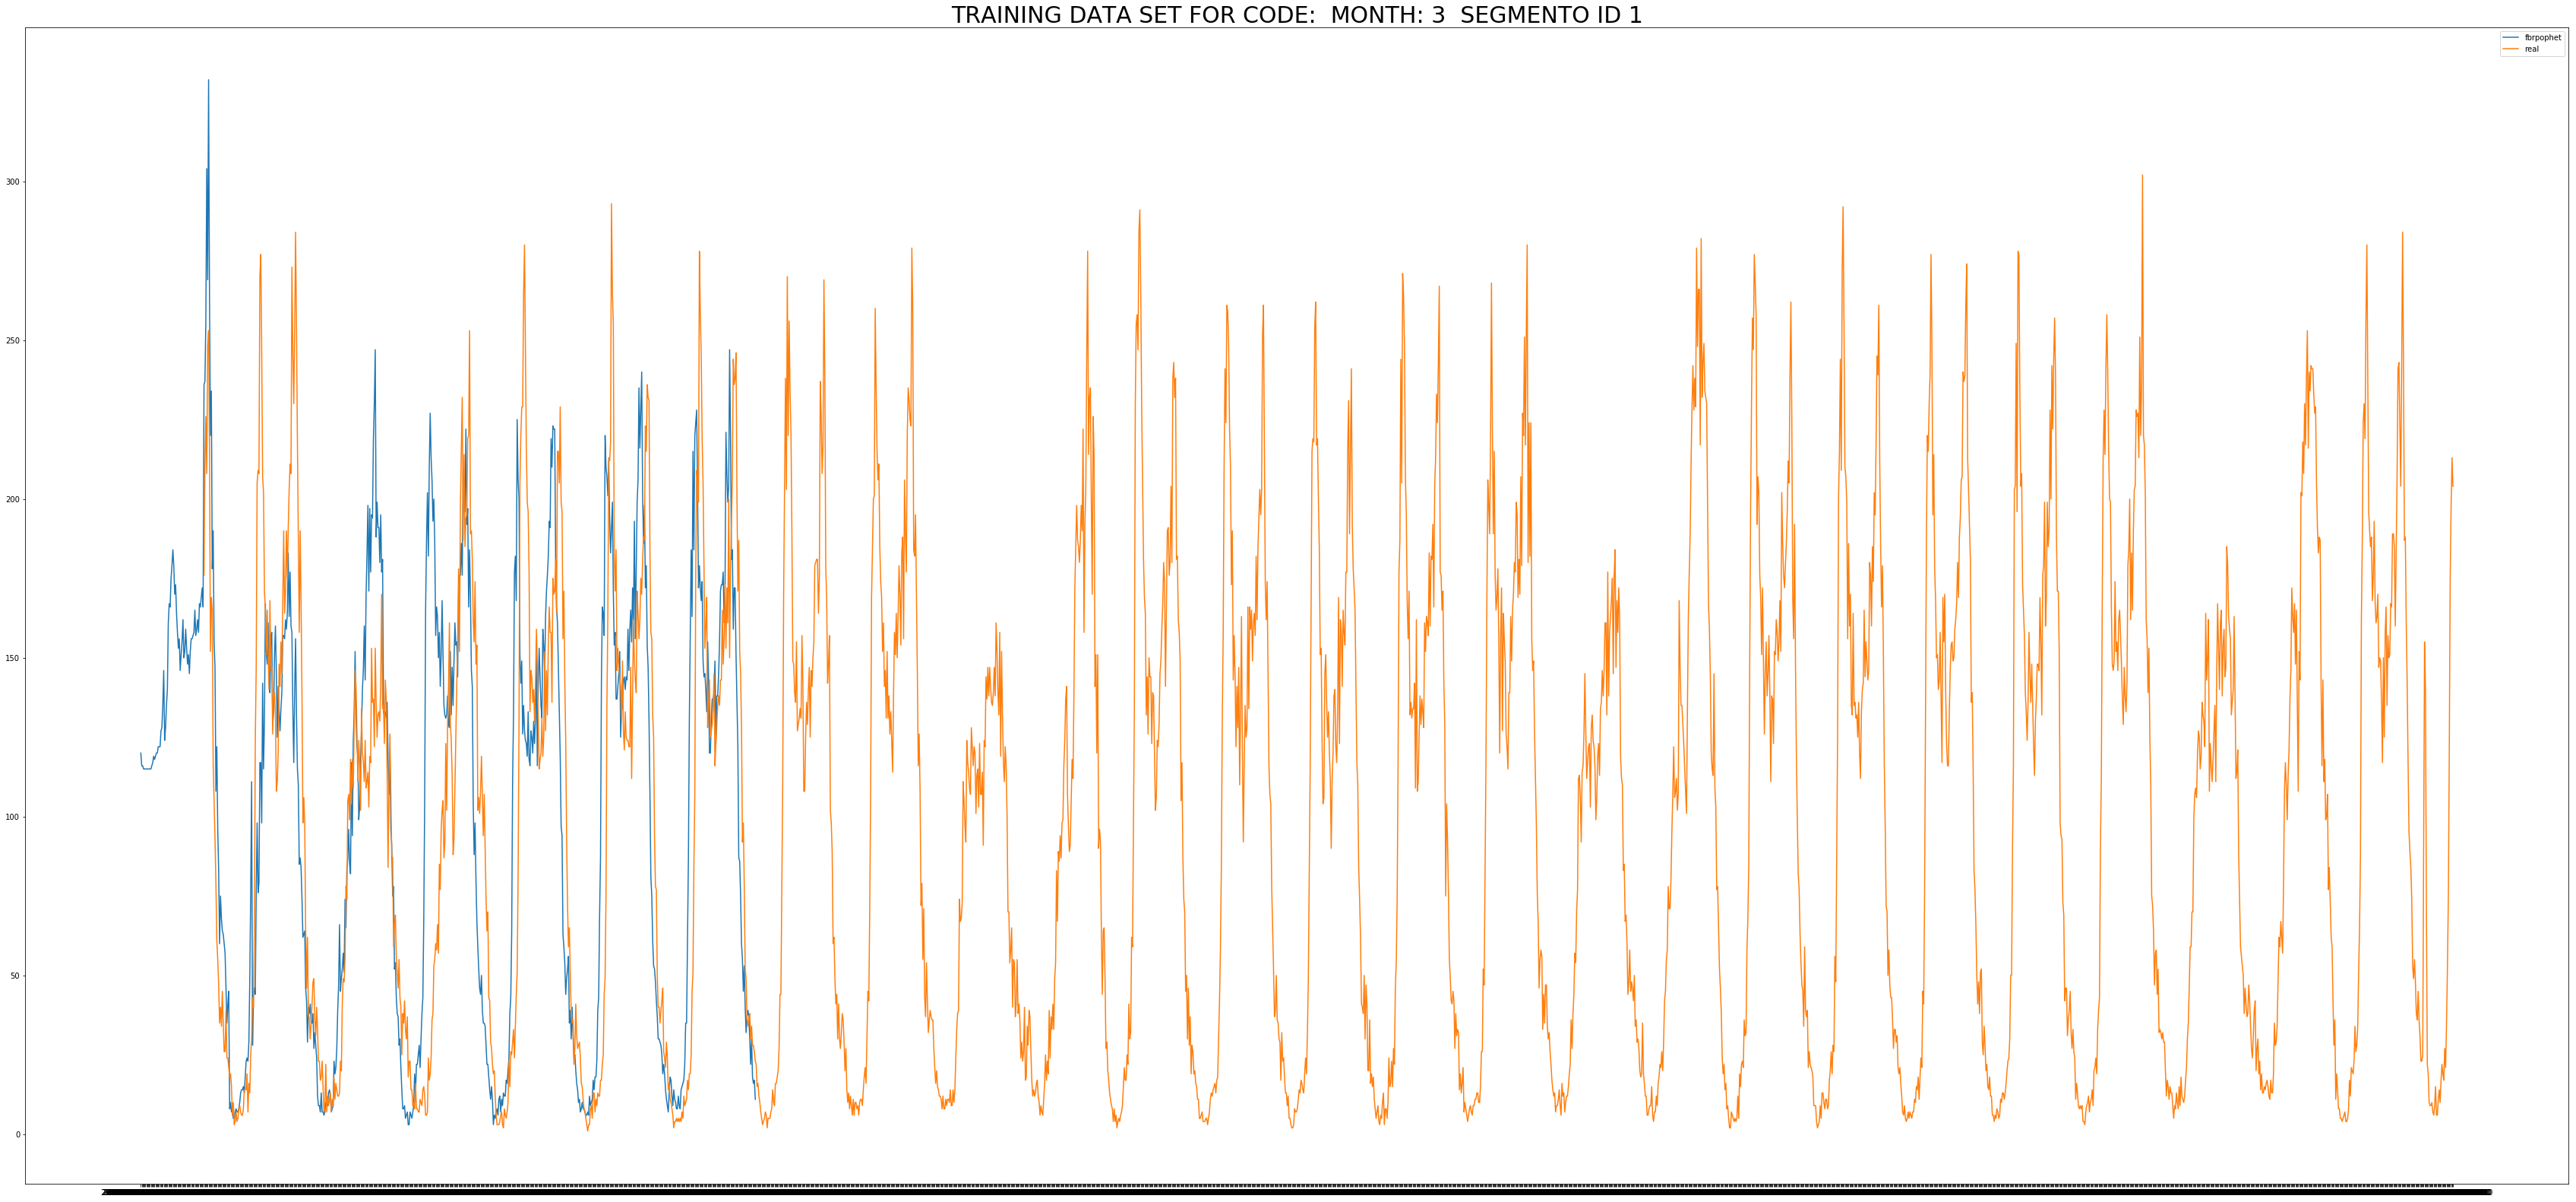

In [68]:
import matplotlib.pyplot as plt

seg_id=1

plt.figure(figsize=(60,28))
plt.title('TRAINING DATA SET FOR CODE:  MONTH: 3 '  + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
plt.plot(results_fbrpophet_seg.FECHA, results_fbrpophet_seg['PREDICCION_INT 120'], marker='', label=str("fbrpophet"))
plt.plot(anual_data_seg.FECHA, anual_data_seg.TOTAL_VEHICULOS, marker='', label=str("real"))
plt.legend(loc='best',  fontsize=10)
plt.show()

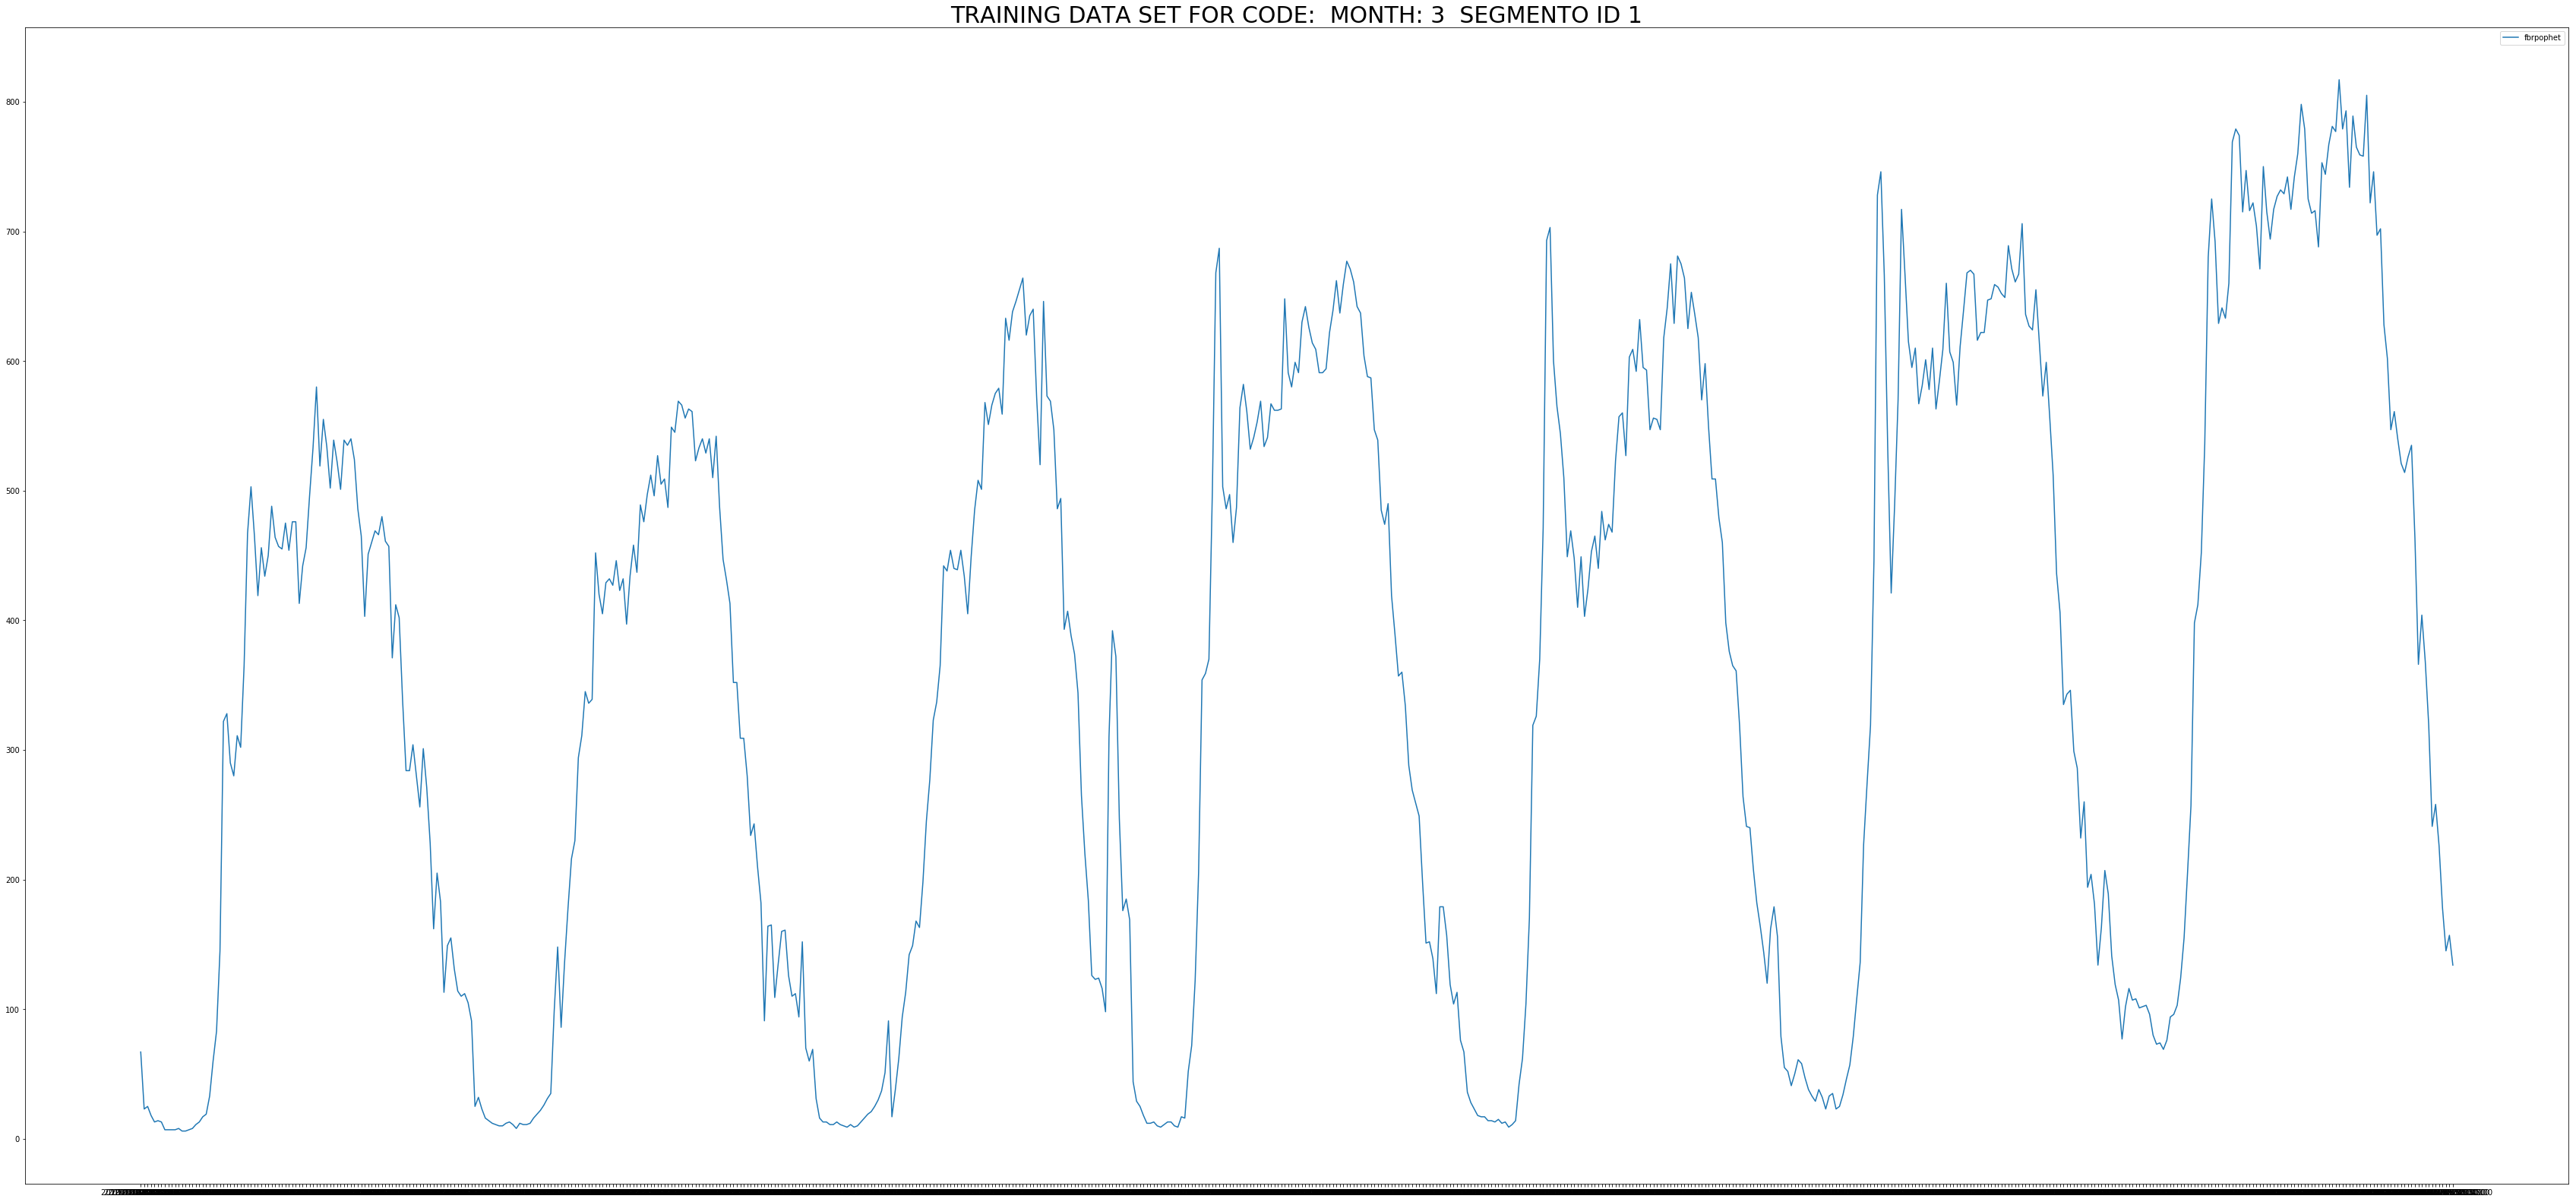

In [49]:
import matplotlib.pyplot as plt

seg_id=1

plt.figure(figsize=(60,28))
plt.title('TRAINING DATA SET FOR CODE:  MONTH: 3 '  + ' SEGMENTO ID ' + str(seg_id) ,  fontsize=30)
plt.plot(results_fbrpophet_seg.FECHA, results_fbrpophet_seg['PREDICCION_INT 120'], marker='', label=str("fbrpophet"))
plt.legend(loc='best',  fontsize=10)
plt.show()

In [50]:
results_fbrpophet_seg.FECHA.unique()

array(['2019-03-01 00:00:00', '2019-03-01 00:15:00',
       '2019-03-01 00:30:00', '2019-03-01 00:45:00',
       '2019-03-01 01:00:00', '2019-03-01 01:15:00',
       '2019-03-01 01:30:00', '2019-03-01 01:45:00',
       '2019-03-01 02:00:00', '2019-03-01 02:15:00',
       '2019-03-01 02:30:00', '2019-03-01 02:45:00',
       '2019-03-01 03:00:00', '2019-03-01 03:15:00',
       '2019-03-01 03:30:00', '2019-03-01 03:45:00',
       '2019-03-01 04:00:00', '2019-03-01 04:15:00',
       '2019-03-01 04:30:00', '2019-03-01 04:45:00',
       '2019-03-01 05:00:00', '2019-03-01 05:15:00',
       '2019-03-01 05:30:00', '2019-03-01 05:45:00',
       '2019-03-01 06:00:00', '2019-03-01 06:15:00',
       '2019-03-01 06:30:00', '2019-03-01 06:45:00',
       '2019-03-01 07:00:00', '2019-03-01 07:15:00',
       '2019-03-01 07:30:00', '2019-03-01 07:45:00',
       '2019-03-01 08:00:00', '2019-03-01 08:15:00',
       '2019-03-01 08:30:00', '2019-03-01 08:45:00',
       '2019-03-01 09:00:00', '2019-03-01 09:1